In [1]:
# 匯入手寫數字資料集
import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train: np.ndarray
y_train: np.ndarray
x_test: np.ndarray
y_test: np.ndarray

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [2]:
# 正規化 一維化
x_train = x_train / 255
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:])).astype('float32')
x_test = x_test / 255
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:])).astype('float32')

print(x_train.shape)
print(x_train[0])


(60000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

In [3]:
from keras.models import Model
from keras.layers import Dense, Input

image_in = Input(shape=(x_train.shape[1],))
first = Dense(x_train.shape[1] / 2, activation='relu')(image_in)
second = Dense(x_train.shape[1] / 4, activation='relu')(first)
third = Dense(x_train.shape[1] / 2, activation='relu')(second)
image_out = Dense(x_train.shape[1], activation='sigmoid')(third)

ae = Model(inputs=image_in, outputs=image_out)
ae.summary()
ae.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 196)               77028     
                                                                 
 dense_2 (Dense)             (None, 392)               77224     
                                                                 
 dense_3 (Dense)             (None, 784)               308112    
                                                                 
Total params: 770,084
Trainable params: 770,084
Non-trainable params: 0
_________________________________________________________________


In [7]:
ae.fit(x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0698 - accuracy: 0.0150 - val_loss: 0.0691 - val_accuracy: 0.0172
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0693 - accuracy: 0.0151 - val_loss: 0.0688 - val_accuracy: 0.0135
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0689 - accuracy: 0.0152 - val_loss: 0.0684 - val_accuracy: 0.0161
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0686 - accuracy: 0.0151 - val_loss: 0.0681 - val_accuracy: 0.0152
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0682 - accuracy: 0.0152 - val_loss: 0.0690 - val_accuracy: 0.0147
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0680 - accuracy: 0.0157 - val_loss: 0.0676 - val_accuracy: 0.0130
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0677 - accuracy: 0.0159 - val_loss: 0.0673 - val_accuracy: 0.0143
Epoch 

In [23]:
encoder = Model(inputs=image_in, outputs=second)
encoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 196)               77028     
                                                                 
Total params: 384,748
Trainable params: 384,748
Non-trainable params: 0
_________________________________________________________________


In [25]:
decoder_in = Input(shape=(int(x_train.shape[1] / 4),))
layer_1 = ae.layers[-2](decoder_in)
layer_2 = ae.layers[-1](layer_1)
decoder = Model(inputs=decoder_in, outputs=layer_2)
decoder.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 196)]             0         
                                                                 
 dense_2 (Dense)             (None, 392)               77224     
                                                                 
 dense_3 (Dense)             (None, 784)               308112    
                                                                 
Total params: 385,336
Trainable params: 385,336
Non-trainable params: 0
_________________________________________________________________


In [39]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 825us/step


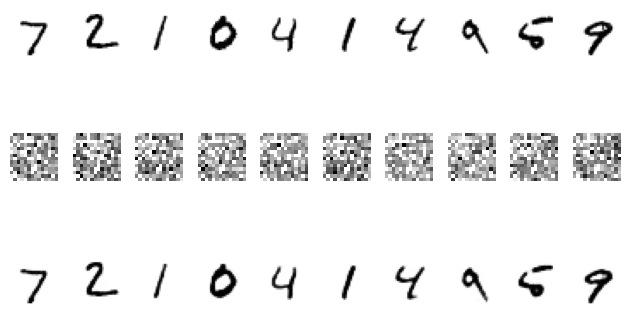

In [40]:
# 印出 0 ~ 9
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(3, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='binary')
    plt.axis('off')
    plt.subplot(3, 10, i + 11)
    plt.imshow(encoded_imgs[i].reshape(14, 14), cmap='binary')
    plt.axis('off')
    plt.subplot(3, 10, i + 21)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='binary')
    plt.axis('off')
    plt.tight_layout()